In [1]:
import pandas as pd
import sklearn
import nltk
import spacy
import matplotlib
import seaborn
import wordcloud


In [9]:
import os
from docx import Document
import pandas as pd

# Function to extract text from .docx files
def extract_text_from_docx(docx_file):
    doc = Document(docx_file)
    text = ""
    for para in doc.paragraphs:
        text += para.text + "\n"  # Adding paragraph text
    return text

# Folder containing your .docx files (change this path)
folder_path = r"C:\Users\ashutosh pathak\OneDrive\Desktop\Resumes

# List to store resume text
resumes_data = []

for filename in os.listdir(folder_path):
    if filename.endswith('.docx'):
        file_path = os.path.join(folder_path, filename)
        resume_text = extract_text_from_docx(file_path)
        resumes_data.append(resume_text)

# Create a DataFrame to store all resumes
resumes_df = pd.DataFrame(resumes_data, columns=['Resume_Text'])

# Save DataFrame to CSV
resumes_df.to_csv('resumes_data.csv', index=False)

In [10]:
import os
import pandas as pd
from docx import Document

# ✅ STEP 1: Set the correct folder path
folder_path =r"C:\Users\ashutosh pathak\OneDrive\Desktop\Resumes"  # <-- Change this to your actual path

# ✅ STEP 2: Function to extract text from docx
def extract_text_from_docx(file_path):
    try:
        doc = Document(file_path)
        return '\n'.join([para.text for para in doc.paragraphs])
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return ''

# ✅ STEP 3: Read all resumes and store text
resumes_data = []
file_names = []

for filename in os.listdir(folder_path):
    if filename.endswith('.docx'):
        print("Reading:", filename)  # Debug info
        file_path = os.path.join(folder_path, filename)
        resume_text = extract_text_from_docx(file_path)
        if resume_text.strip():  # Ensure it's not empty
            resumes_data.append(resume_text)
            file_names.append(filename)

print("✅ Total resumes processed:", len(resumes_data))

# ✅ STEP 4: Save to CSV
if resumes_data:
    df = pd.DataFrame({'filename': file_names, 'resume_text': resumes_data})
    output_file = 'resumes_data.csv'
    df.to_csv(output_file, index=False, encoding='utf-8')
    print(f"✅ CSV saved successfully as: {output_file}")
    print("📁 Location:", os.getcwd())
else:
    print("⚠️ No resumes were processed. Please check your folder path or file types.")


Reading: Abiral_Pandey_Fullstack_Java.docx
Reading: Achyuth Resume_8.docx
Reading: Adelina_Erimia_PMP1.docx
Reading: Adhi Gopalam - SM.docx
Reading: AjayKumar.docx
Reading: Akhil.profile.docx
Reading: Akhil_Sr BSA.docx
Reading: Alekhya Resume.docx
Reading: Amar Sr BSA.docx
Reading: Ami Jape.docx
Reading: Amrinder Business Analyst.docx
Reading: Amulya Komatineni.docx
Reading: Anil Krishna Mogalaturthi.docx
Reading: AnilAgarwal.docx
Reading: Anudeep N_Sr Java Developer.docx
Reading: Ashok Jayakumar - PM.docx
Reading: Ashwini J2EE Developer.docx
Reading: Atul_Mathur_Resume.docx
Reading: Avathika BA-Healthcare_.docx
Reading: avinash G.docx
Reading: B Shaker-Sr BSA-Scrum Master .docx
Reading: B Suresh Kumar_Project Manager_1.docx
Reading: BA - Abhishek.docx
Reading: BA - Navneet.docx
Reading: BA Kiran.docx
Reading: BA with INV.docx
Reading: Balaji Gopalakrishnan Project Manager.docx
Reading: Balakrishna Sudabathula.docx
Reading: Bapuji Hadoop developer.docx
Reading: Bharat Arora_CV_PMP _ ER

In [11]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\ashutosh
[nltk_data]     pathak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\ashutosh
[nltk_data]     pathak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
df = pd.read_csv(r"C:\Users\ashutosh pathak\OneDrive\Desktop\resumes_data.csv")
print(df.head())


                            filename  \
0  Abiral_Pandey_Fullstack_Java.docx   
1              Achyuth Resume_8.docx   
2           Adelina_Erimia_PMP1.docx   
3             Adhi Gopalam - SM.docx   
4                     AjayKumar.docx   

                                         resume_text  
0  Name: Abiral Pandey\nEmail: abiral.pandey88@gm...  
1  Achyuth\n540-999-8048\nachyuth.java88@gmail.co...  
2  Adelina Erimia, PMP, Six Sigma Green Belt, SMC...  
3  Adhi Gopalam\nadhigopalam@gmail.com\n281-212-3...  
4  Ajay Kumar (CSM)\t     \t\t     Email/Skype: a...  


In [13]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize words
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 2]
    # Join words back
    return ' '.join(words)


In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download only what we need
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    if not isinstance(text, str):
        return ''
    
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word.isalpha()]
    
    return ' '.join(words)


[nltk_data] Downloading package punkt to C:\Users\ashutosh
[nltk_data]     pathak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ashutosh
[nltk_data]     pathak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
df['cleaned_text'] = df['resume_text'].apply(clean_text)


In [23]:
print(df[['filename', 'cleaned_text']].head(3))


                            filename  \
0  Abiral_Pandey_Fullstack_Java.docx   
1              Achyuth Resume_8.docx   
2           Adelina_Erimia_PMP1.docx   

                                        cleaned_text  
0  name abiral pandey email phone current locatio...  
1  achyuth objective around years strong software...  
2  adelina erimia pmp six sigma green belt smc er...  


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned resume text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert the TF-IDF matrix to a DataFrame to view the result (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the resulting TF-IDF matrix (optional)
print(tfidf_df.head())


   aaa  aache  aacps  aadhya  aaf  aalaverage  aapc   ab  abap  abbett  ...  \
0  0.0    0.0    0.0     0.0  0.0         0.0   0.0  0.0   0.0     0.0  ...   
1  0.0    0.0    0.0     0.0  0.0         0.0   0.0  0.0   0.0     0.0  ...   
2  0.0    0.0    0.0     0.0  0.0         0.0   0.0  0.0   0.0     0.0  ...   
3  0.0    0.0    0.0     0.0  0.0         0.0   0.0  0.0   0.0     0.0  ...   
4  0.0    0.0    0.0     0.0  0.0         0.0   0.0  0.0   0.0     0.0  ...   

   zookeeperis  zookeeperjava  zookeeperto  zos  zsb  zul  zulu  zurich  zuul  \
0          0.0            0.0          0.0  0.0  0.0  0.0   0.0     0.0   0.0   
1          0.0            0.0          0.0  0.0  0.0  0.0   0.0     0.0   0.0   
2          0.0            0.0          0.0  0.0  0.0  0.0   0.0     0.0   0.0   
3          0.0            0.0          0.0  0.0  0.0  0.0   0.0     0.0   0.0   
4          0.0            0.0          0.0  0.0  0.0  0.0   0.0     0.0   0.0   

    形見  
0  0.0  
1  0.0  
2  0.0  
3 

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Convert the cosine similarity matrix to a DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['filename'], columns=df['filename'])

# Display the cosine similarity matrix
print(cosine_sim_df.head())


filename                           Abiral_Pandey_Fullstack_Java.docx  \
filename                                                               
Abiral_Pandey_Fullstack_Java.docx                           1.000000   
Achyuth Resume_8.docx                                       0.694123   
Adelina_Erimia_PMP1.docx                                    0.041740   
Adhi Gopalam - SM.docx                                      0.103610   
AjayKumar.docx                                              0.202059   

filename                           Achyuth Resume_8.docx  \
filename                                                   
Abiral_Pandey_Fullstack_Java.docx               0.694123   
Achyuth Resume_8.docx                           1.000000   
Adelina_Erimia_PMP1.docx                        0.058574   
Adhi Gopalam - SM.docx                          0.123399   
AjayKumar.docx                                  0.214450   

filename                           Adelina_Erimia_PMP1.docx  \
filename   

In [26]:
# Set the number of top similar resumes you want to retrieve (e.g., top 3)
top_n = 3

# Function to get the top N most similar resumes for a given document (job description)
def get_top_n_similar_resumes(cosine_sim_df, document_name, top_n=3):
    # Get the cosine similarity scores for the given document
    similarity_scores = cosine_sim_df[document_name]
    
    # Sort the similarity scores in descending order and get the top N
    top_similar_resumes = similarity_scores.sort_values(ascending=False).head(top_n)
    
    return top_similar_resumes

# Example usage: Get the top 3 most similar resumes to "Abiral_Pandey_Fullstack_Java.docx"
top_resumes = get_top_n_similar_resumes(cosine_sim_df, "Abiral_Pandey_Fullstack_Java.docx", top_n=3)

# Display the top N most similar resumes
print(top_resumes)


filename
Abiral_Pandey_Fullstack_Java.docx    1.000000
KIRAN KUMAR.docx                     0.748466
nithin katapally.docx                0.735204
Name: Abiral_Pandey_Fullstack_Java.docx, dtype: float64


In [27]:
# Example: Find the top 3 most similar resumes for a new job description
job_description = "Achyuth Resume_8.docx"
top_resumes_for_job = get_top_n_similar_resumes(cosine_sim_df, job_description, top_n=3)

# Display the top resumes
print(f"Top 3 most similar resumes for {job_description}:")
print(top_resumes_for_job)


Top 3 most similar resumes for Achyuth Resume_8.docx:
filename
Achyuth Resume_8.docx    1.000000
Saiteja G.docx           0.887288
Rohanu Resume.docx       0.805769
Name: Achyuth Resume_8.docx, dtype: float64


In [28]:
import pandas as pd

# Assuming `similarity_scores` is a dictionary of job descriptions as keys
# and their top 3 similar resumes with scores as values

similarity_scores = {
    "Abiral_Pandey_Fullstack_Java.docx": [
        {"filename": "Abiral_Pandey_Fullstack_Java.docx", "similarity_score": 1.000000},
        {"filename": "KIRAN KUMAR.docx", "similarity_score": 0.748466},
        {"filename": "nithin katapally.docx", "similarity_score": 0.735204},
    ],
    "Achyuth Resume_8.docx": [
        {"filename": "Achyuth Resume_8.docx", "similarity_score": 1.000000},
        {"filename": "Saiteja G.docx", "similarity_score": 0.887288},
        {"filename": "Rohanu Resume.docx", "similarity_score": 0.805769},
    ],
    # Add other job descriptions and their similarity results here
}

# Flatten the dictionary to a list of rows
rows = []
for job_desc, results in similarity_scores.items():
    for result in results:
        rows.append({
            "job_description": job_desc,
            "resume_filename": result["filename"],
            "similarity_score": result["similarity_score"]
        })

# Create a DataFrame
df_similarity = pd.DataFrame(rows)

# Save the DataFrame to a CSV file
df_similarity.to_csv('resume_similarity_results.csv', index=False)

print("Similarity results have been saved to 'resume_similarity_results.csv'.")


Similarity results have been saved to 'resume_similarity_results.csv'.


In [29]:
import pandas as pd

# Load the similarity results from the CSV
df = pd.read_csv('resume_similarity_results.csv')

# Sort by job_description and similarity_score (descending)
df_sorted = df.sort_values(by=['job_description', 'similarity_score'], ascending=[True, False])

# Get top 3 resumes per job_description
top_matches = df_sorted.groupby('job_description').head(3)

# Save the top matches to a new CSV
top_matches.to_csv('top_3_resumes_per_job.csv', index=False)

print("Top 3 resumes per job description saved to 'top_3_resumes_per_job.csv'")


Top 3 resumes per job description saved to 'top_3_resumes_per_job.csv'


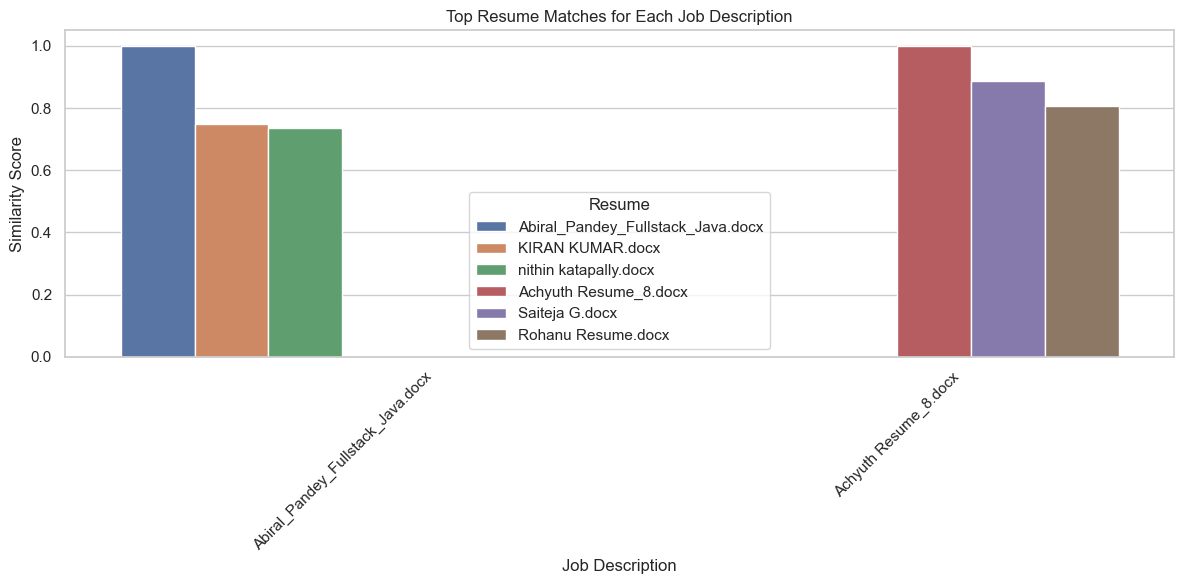

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('resume_similarity_results.csv')

# Set plot style
sns.set(style="whitegrid")

# Create barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="job_description", y="similarity_score", hue="resume_filename")

# Add title and labels
plt.title("Top Resume Matches for Each Job Description")
plt.xlabel("Job Description")
plt.ylabel("Similarity Score")
plt.xticks(rotation=45)
plt.legend(title="Resume")

# Show the plot
plt.tight_layout()
plt.show()
